In [1]:
import pandas as pd

In [2]:
!ls

ArchivalQA_test.csv  ArchivalQA_val.csv
ArchivalQA_train.csv data_parsing.ipynb


In [84]:
import random

def load_archival_qa_data(seed, thr=7):
    df_train = pd.read_csv('ArchivalQA_train.csv')
    df_test = pd.read_csv('ArchivalQA_test.csv')
    df_val = pd.read_csv('ArchivalQA_val.csv')
    
    df = pd.concat([df_train, df_val, df_test])
    df['q_length'] = df['question'].apply(lambda x: len(x.split()))
    df = df[df['q_length'] < thr]
    q, a = df['question'], df['answer']
    qa = list(zip(q, a))
    random.Random(seed).shuffle(qa)
    return qa

In [86]:
qa = load_archival_qa_data(0)

[("Who was Salvatore Michael Amore's wife?", 'Jeanne'),
 ("Who wrote ''The Nature of Monsters''?", 'Clark'),
 ("Who was Stephen Alexander Teager's father?", 'Shushan Teager'),
 ("What was Major John King's nationality?", 'East African'),
 ("Where is Mr. Dollar's home located?", 'Atlanta'),
 ("Who is Ron Hextall's paternal grandfather?", 'Bryan'),
 ("Who is Lisa's Law named for?", 'Lisa Smart'),
 ("Who was Poland's President in 1968?", 'Wojciech Jaruzelski'),
 ('Who expelled Cuban forces in 1983?', 'United States'),
 ("Where is Coffee Connection's headquarters located?", 'Boston'),
 ('Coca-Cola is a sponsor of what?', 'the United States Olympic Committee'),
 ("What is Andrei Bitov's memoir called?", 'A Captive of the Caucasus'),
 ("Where is Bell Labs' headquarters located?", 'Murray Hill'),
 ("Who funded Zedillo's 1994 presidential campaign?", 'PRI'),
 ("Who is Ferraroni's co-owner?", 'Jeff Kahn'),
 ("Who was Mr. Wei's youngest sister?", 'Wei Shanshan'),
 ("What was the C.I.A.'s predece

In [13]:
df_train['q_length'] = df_train['question'].apply(lambda x: len(x.split()))

<AxesSubplot:>

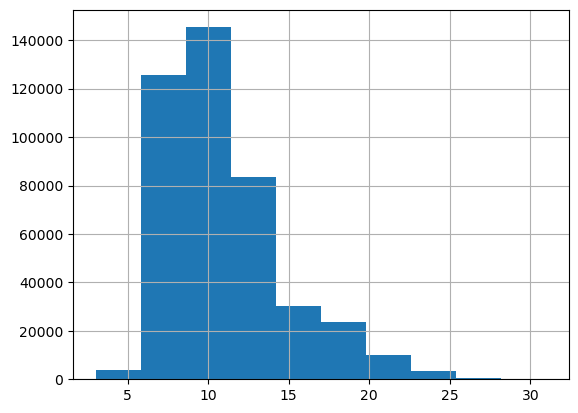

In [14]:
%matplotlib inline
df_train['q_length'].hist()

In [25]:
thresholds = [15, 12, 9, 8, 7]
sample_questions = []
for thr in thresholds:
    df_thr = df_train[df_train['q_length'] == thr]
    print(df_train[df_train['q_length'] <= thr].shape[0])
    df_sample = df_thr.sample(30)
    sample_qs = df_sample['question'].values
    sample_questions.append(sample_qs)

375157
308761
185217
129295
70178


In [27]:
sample_questions[4]

array(["What day did Mr. Mendes' death occur?",
       'What university does Mr. Oakes consult with?',
       "What is Dr. Kirilov's old classmate's nickname?",
       'What religion was Zain Abu Bakr al-Mehdar?',
       'Where is the Christian Defense Coalition located?',
       'What nationality of police did Israel arm?',
       'When did Bo Dietl run for Congress?',
       'Alain Juppe was a spokesman for whom?',
       'Gouara Lassou is the Minister of what?',
       'What film did Michael Powell star in?',
       "Who is Taiwan's first Nationalist Party leader?",
       'What political party is Alfred E. Steele?',
       'Who is a co-writer with Mr. Haggis?',
       "When did Jura receive his master's degree?",
       "When did Norton replace Babbitt's own rules?",
       'What political party is William J. Knight?',
       'Where was the Iraqi National Museum located?',
       "When was Mark McGwire's testimony before lawmakers?",
       "When will ''The Little Dog Laughed'' ope

In [22]:
df_train.head()

,id,question,answer,org_answer,answer_start,para_id,trans_que,trans_ans,source,q_length
0,train_0,Who claimed responsibility for the bombing of ...,Al Qaeda,Al Qaeda,184,1839755_20,0,0,wiki,9
1,train_1,Who will resume sovereignty in Hong Kong on Ju...,China,China,80,904696_1,1,0,wiki,11
2,train_2,Which company will make an initial payment of ...,Coastal,Coastal,91,876573_10,0,0,rand,12
3,train_3,In what year was Don Bolles killed?,1976,1976,123,410119_0,0,0,rand,7
4,train_4,When did Tenneco announce it was planning to s...,"May 26, 1988",today,103,148748_0,0,1,rand,14


In [24]:
df_train.source.unique()

array(['wiki', 'rand'], dtype=object)

In [51]:
df_train_filtered = df_train[df_train['q_length'] <= 7]
q, a = df_train_filtered['question'].values, df_train_filtered['answer'].values

In [52]:
qa_flattened = list(zip(q, a))

In [53]:
import spacy

In [58]:
n = 200
# extract top n most common PERSON entities and n most common ORG entities
# saves to entities_list.txt
questions, _ = zip(*qa_flattened)
nlp = spacy.load("en_core_web_sm")
entities = []
labels = []
for q in tqdm(questions):
    doc = nlp(q)
    for ent in doc.ents:
        entities.append(ent.text)
        labels.append(ent.label_)


100%|██████████| 70178/70178 [05:27<00:00, 214.18it/s]


NameError: name 'np' is not defined

In [55]:
from tqdm import tqdm

In [62]:
from collections import Counter
import numpy as np

In [65]:
mask_person = np.array(labels) == 'PERSON'
mask_org = np.array(labels) == 'ORG'

entities_orgs = np.array(entities)[mask_org]
entities_person = np.array(entities)[mask_person]

cnt_orgs = Counter(entities_orgs)
cnt_persons = Counter(entities_person)

top_persons = [key for key, cnt in cnt_orgs.most_common(n // 2)]
top_orgs = [key for key, cnt in cnt_persons.most_common(n // 2)]
entities_list = top_persons + top_orgs
entities_list = sorted(entities_list, key=lambda x: len(x), reverse=True)
with open('entities_list_new.txt', 'w') as f:
    for ent in entities_list:
        f.write(ent + '\n')

In [ ]:
pd.read